In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/")

In [4]:
%cd '/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/'

/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1


In [0]:
# Run some setup code for this notebook.
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [6]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


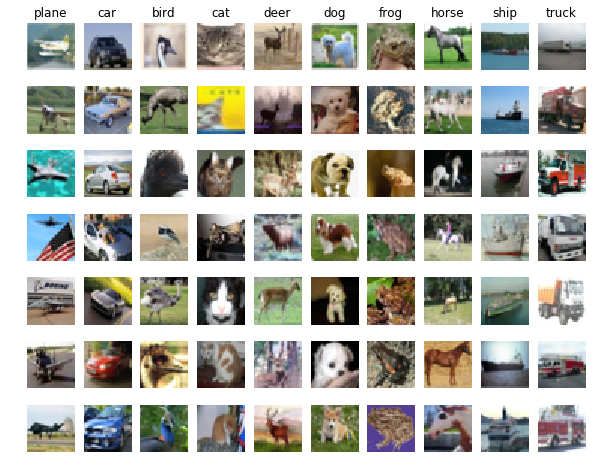

In [7]:
# Visualize some examples from the dataset.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
# Split the data into train, val, and test sets.
# In addition we will create a samll development set as a subset of the
# training data; we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will alo make a development set, which is a small subset of the training set.
mask =np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our test set.
mask = range(num_test)
X_test = X_test[mask]
y_test= y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [9]:
# Preprocessing: reshape theimage data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


mean image shape:  (3072,)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


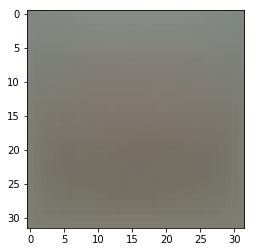

In [10]:
# Preprocessing: substract the mean image
# first: compute theimage mean based on the training data
# pixel-wise mean.
mean_image = np.mean(X_train, axis=0)
print("mean image shape: ", mean_image.shape)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8')) # visualize the mean image
plt.show()

In [0]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [0]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev= np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## SVM Classifier

Your code for this section will all be written inside **cs231n/classifiers/linear_svm.py**. 

As you can see, we have prefilled the function `compute_loss_naive` which uses for loops to evaluate the multiclass SVM loss function. 

In [15]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

# Generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.499584


In [0]:
import cs231n.classifiers.linear_svm

In [0]:
import importlib
importlib.reload(cs231n.classifiers.linear_svm)
from cs231n.classifiers import svm_loss_naive

In [18]:
# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with my analytically computed gradient.
# The numbers should match almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# gradient check once again with regularization turend on
loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 4.296430 analytic: 4.296430, relative error: 8.619915e-11
numerical: 22.105299 analytic: 22.105299, relative error: 8.530657e-12
numerical: 7.032180 analytic: 7.032180, relative error: 5.996447e-11
numerical: 18.479755 analytic: 18.479755, relative error: 3.753180e-12
numerical: 3.686803 analytic: 3.686803, relative error: 5.389401e-12
numerical: -6.503067 analytic: -6.503067, relative error: 3.745860e-11
numerical: 3.831948 analytic: 3.831948, relative error: 1.103221e-11
numerical: 13.091719 analytic: 13.091719, relative error: 1.905269e-11
numerical: 7.044595 analytic: 7.044595, relative error: 7.814441e-11
numerical: -25.262802 analytic: -25.262802, relative error: 3.014620e-12
numerical: 7.238614 analytic: 7.238614, relative error: 3.787138e-12
numerical: 3.625086 analytic: 3.625086, relative error: 2.222403e-10
numerical: 19.094762 analytic: 19.094762, relative error: 1.607774e-11
numerical: 0.742456 analytic: 0.742456, relative error: 1.818779e-12
numerical: -18.96609

**Inline Question 1**

It is possible that once in a while a dimension in the gradcheck will not match exactly. What could such a discrepancy be caused by? Is it a reason for concern? What is a simple example in one dimension where a gradient check could fail? How would change the margin affect of the frequency of this happening? *Hint: the SVM loss function is not strictly speaking differentiable*

$\color{blue}{\textit Your Answer:}$ *SVM loss is not differnetiable at point 0.*  

In [38]:
# Implement the funciton svm_loss_vectorized;
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
# loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)

toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# The losses should e match
print('differnece: %f' % (loss_naive - loss_vectorized))

Naive loss: 9.499584e+00 computed in 0.254754s
Vectorized loss: 9.499584e+00 computed in 0.009196s
differnece: -0.000000


### Stochastic Gradient Descent

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

In [40]:
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, 
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 794.262156
iteration 100 / 1500: loss 288.395113
iteration 200 / 1500: loss 108.149790
iteration 300 / 1500: loss 43.159228
iteration 400 / 1500: loss 19.161936
iteration 500 / 1500: loss 10.216767
iteration 600 / 1500: loss 6.953046
iteration 700 / 1500: loss 5.773701
iteration 800 / 1500: loss 6.021137
iteration 900 / 1500: loss 5.596019
iteration 1000 / 1500: loss 5.486798
iteration 1100 / 1500: loss 5.689239
iteration 1200 / 1500: loss 5.677083
iteration 1300 / 1500: loss 5.336046
iteration 1400 / 1500: loss 5.176388
That took 7.421566s


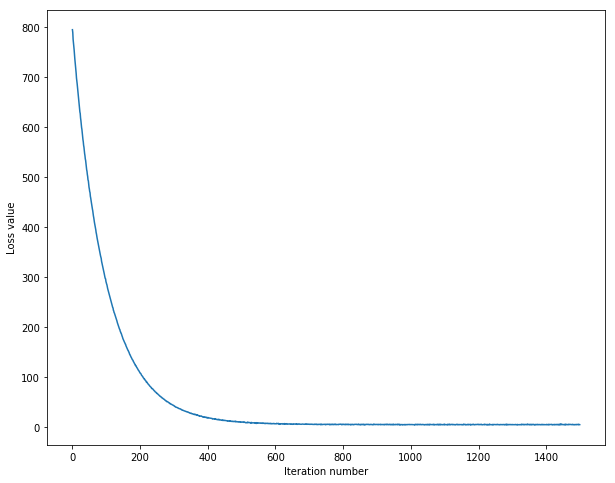

In [41]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [42]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.368551
validation accuracy: 0.369000


In [0]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.39 on the validation set.

learning_rates = [1e-7, 5e-5, 5e-3, 5e-2]
regularization_strengths = [1.0e3, 5.0e3, 2.5e4, 5e4, 9e4, 2.5e6]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1 # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achived the hightest validation rate.

In [45]:
################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()        
        loss_hist = svm.train(X_train, y_train, learning_rate=learning_rate, 
                              reg=regularization_strength, num_iters=500, 
                              verbose=True)
        
        y_pred_train = svm.predict(X_train)
        y_pred_val = svm.predict(X_val)
        train_acc = np.mean(y_train == y_pred_train)
        val_acc = np.mean(y_val == y_pred_val)
        results[(learning_rate, regularization_strength)] = \
                (train_acc, val_acc)
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm
        
        
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    

iteration 0 / 500: loss 50.166954
iteration 100 / 500: loss 40.049753
iteration 200 / 500: loss 37.534591
iteration 300 / 500: loss 36.809905
iteration 400 / 500: loss 34.262523
iteration 0 / 500: loss 171.934229
iteration 100 / 500: loss 135.684893
iteration 200 / 500: loss 111.062287
iteration 300 / 500: loss 90.667107
iteration 400 / 500: loss 74.885883
iteration 0 / 500: loss 799.557128
iteration 100 / 500: loss 291.365858
iteration 200 / 500: loss 109.507514
iteration 300 / 500: loss 42.782656
iteration 400 / 500: loss 18.845048
iteration 0 / 500: loss 1571.744182
iteration 100 / 500: loss 212.706490
iteration 200 / 500: loss 33.494925
iteration 300 / 500: loss 9.562939
iteration 400 / 500: loss 5.992977
iteration 0 / 500: loss 2783.358330
iteration 100 / 500: loss 78.085484
iteration 200 / 500: loss 8.087288
iteration 300 / 500: loss 5.696258
iteration 400 / 500: loss 6.050007
iteration 0 / 500: loss 78089.892620
iteration 100 / 500: loss 8.244359
iteration 200 / 500: loss 8.4652

/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:96: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:96: RuntimeWarning: overflow encountered in multiply
  


iteration 300 / 500: loss inf
iteration 400 / 500: loss inf
iteration 0 / 500: loss 2782.076995
iteration 100 / 500: loss 11709069448059249285724196246693053130019948632598677695236788382413262934250168097457943456285627133341957239194931584312154554189681134076732342956205129098593737962275730784614612992.000000
iteration 200 / 500: loss inf
iteration 300 / 500: loss inf


/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:118: RuntimeWarning: overflow encountered in multiply
  
/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:112: RuntimeWarning: invalid value encountered in greater
  valid_margin_count = np.sum(margin, axis=1)


iteration 400 / 500: loss nan
iteration 0 / 500: loss 77106.589206
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 52.281583
iteration 100 / 500: loss 197946998942212113826615278887941198366196908349746545886140274053673567972329284935361620282411159600539746784695930780710967861011677524267099988948311477587820009920476522211202332437812084736.000000
iteration 200 / 500: loss inf
iteration 300 / 500: loss inf


/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:90: RuntimeWarning: overflow encountered in subtract
  margin = np.max(0, scores - correct_class_scores + 1)
/content/gdrive/My Drive/Colab Notebooks/cs231n/assignment1/cs231n/classifiers/linear_svm.py:90: RuntimeWarning: invalid value encountered in subtract
  margin = np.max(0, scores - correct_class_scores + 1)


iteration 400 / 500: loss nan
iteration 0 / 500: loss 175.958367
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 794.118393
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 1570.031979
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2753.311582
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 75976.960267
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 49.181571
iteration 100 / 500: loss inf
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 177.884044
it

In [46]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val_accuracy: %f' % (
            lr, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 1.000000e+03 train accuracy: 0.259224 val_accuracy: 0.262000
lr 1.000000e-07 reg 5.000000e+03 train accuracy: 0.286653 val_accuracy: 0.301000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.362367 val_accuracy: 0.367000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.354224 val_accuracy: 0.344000
lr 1.000000e-07 reg 9.000000e+04 train accuracy: 0.340531 val_accuracy: 0.347000
lr 1.000000e-07 reg 2.500000e+06 train accuracy: 0.235551 val_accuracy: 0.247000
lr 5.000000e-05 reg 1.000000e+03 train accuracy: 0.204469 val_accuracy: 0.216000
lr 5.000000e-05 reg 5.000000e+03 train accuracy: 0.161816 val_accuracy: 0.174000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.061796 val_accuracy: 0.055000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.048796 val_accuracy: 0.063000
lr 5.000000e-05 reg 9.000000e+04 train accuracy: 0.100265 val_accuracy: 0.087000
lr 5.000000e-05 reg 2.500000e+06 train accuracy: 0.100265 val_accuracy: 0.087000
lr 5.000000e-03 reg 1.000000

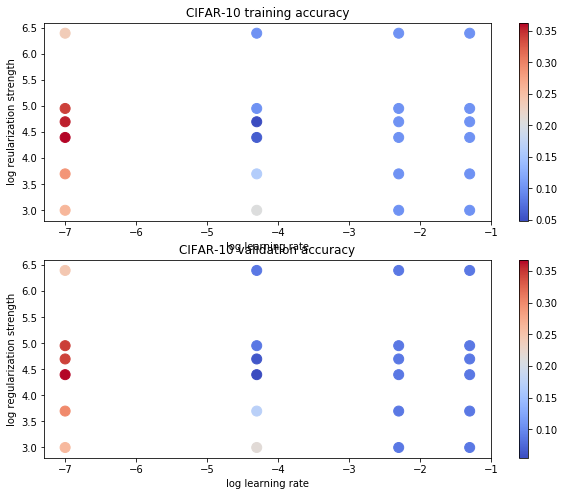

In [47]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log reularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [48]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % (test_accuracy))

linear SVM on raw pixels final test set accuracy: 0.374000


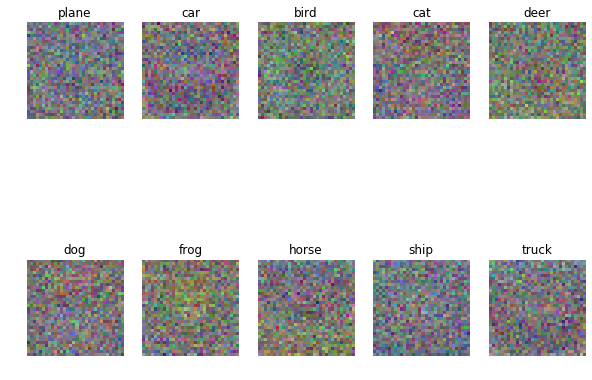

In [50]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

**Inline question 2**

Describe what your visualized SVM weights look like, and offer a brief explanation for why they look they way that they do.

$\color{blue}{\textit Your Answer:}$ *The SVM weights look like a combination of images for each class. For instance, the weights of the class horse look like a horse with two heads but that happens because in the dataset we may have different images of horses, some of them looking at the left and others at the right. The images are blurred because the accuracy obtained was very low. In the end, the weights are templates for each class that have been learned from the data. Unlike KNN where we had to compare a test image with all the training examples in order to predict its class, in this case, we compare the test image with the templates by using the inner product instead of L1 or L2 distance.*  
